In [1]:
%pip install xgboost lightgbm catboost


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.5 MB 1.7 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.5 MB 1.8 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.5 MB 2.9 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.5 MB 3.2 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.5 MB 3.7 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.5 MB 4.4 MB/s eta 0:00:01
   -------------------------------------- - 1.4/1.5 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.4/102.4 MB 7.4 MB/s eta 0:00:14
   ---------------------------------------- 0.7/102.4 MB 8.4 MB/s eta 0:00:13
   ---------------------------------------- 1.0/102.4 MB 7.9 MB/s eta 0:00:13
    --------------

In [2]:
# Import advanced ensemble regressors
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Load dataset
df = pd.read_csv("final.csv")
print("Original dataset shape:", df.shape)
print(df.info())

Original dataset shape: (9928, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9928 entries, 0 to 9927
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  9928 non-null   object 
 1   Year                                     9928 non-null   int64  
 2   Gender                                   9928 non-null   object 
 3   Life expectancy                          9928 non-null   float64
 4   Unemployment                             9928 non-null   float64
 5   Infant Mortality                         9928 non-null   float64
 6   GDP                                      9928 non-null   float64
 7   GNI                                      9928 non-null   float64
 8   Clean fuels and cooking technologies     9928 non-null   float64
 9   Per Capita                               9928 non-null   float64
 10  Mortality cau

In [5]:

# Prepare data again after session reset

X = df.drop(columns=["Country", "Gender", "Life expectancy", "Year"])
y = df["Life expectancy"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.3)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual Life Expectancy")
    plt.ylabel("Predicted Life Expectancy")
    plt.title(f"{model_name}: Predicted vs Actual")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [7]:

# Define models
advanced_models = {
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}


In [8]:

# Function to evaluate models
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_predictions(y_test, y_pred, name)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return {
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    }


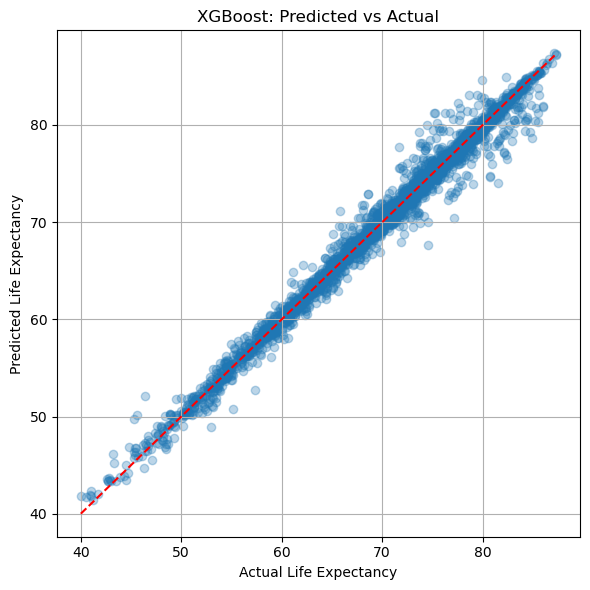

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4460
[LightGBM] [Info] Number of data points in the train set: 6949, number of used features: 18
[LightGBM] [Info] Start training from score 69.729878


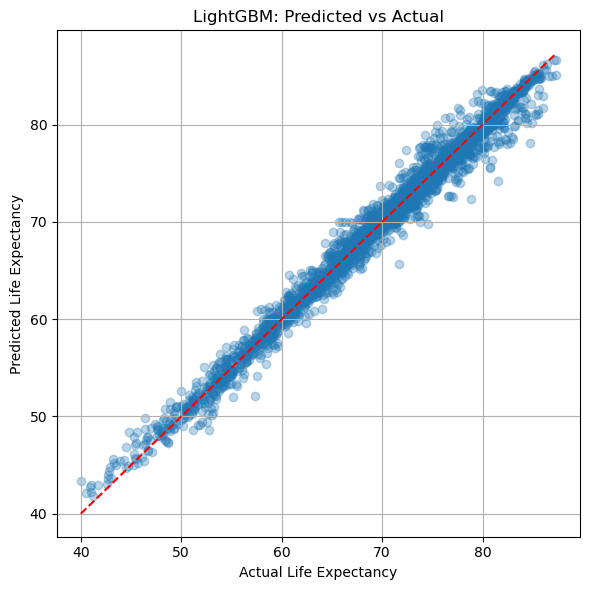

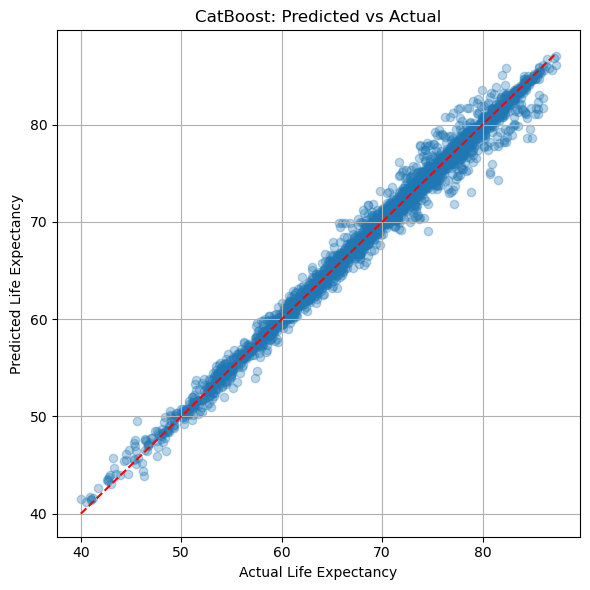

In [9]:

# Evaluate and collect results
advanced_results = []
for name, model in advanced_models.items():
    result = evaluate_model(name, model, X_train, y_train, X_test, y_test)
    advanced_results.append(result)


In [10]:

# Convert results to DataFrame
advanced_results_df = pd.DataFrame(advanced_results)
# Just display the first few rows or save the file locally
print(advanced_results_df.head())

# OR save to CSV for further use
advanced_results_df.to_csv("advanced_results.csv", index=False)

      Model       MAE       MSE      RMSE        R²
0   XGBoost  0.706269  1.273299  1.128405  0.984978
1  LightGBM  0.826552  1.425290  1.193855  0.983184
2  CatBoost  0.667724  1.057703  1.028447  0.987521


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from catboost import CatBoostRegressor

# Load your dataset
df = pd.read_csv("modified.csv")
X = df.drop(columns=["Country", "Gender", "Year.1", "Life expectancy", "Year"])
y = df["Life expectancy"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base model
cat_model = CatBoostRegressor(verbose=0, random_state=42)

# Parameter grid
param_dist = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'iterations': [100, 200, 300, 500],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best MSE:", -random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 6}
Best MSE: 0.01529678371476978
